# End to End Machine Learning Example

## The Problem

We will need to predict a district's median home value.

## Download the Data

In [37]:
import os
import tarfile
import urllib

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

In [13]:
# Path Variables

DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/'
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'
HOUSING_PATH = os.path.join('datasets','housing')
DATA_FILE = 'housing.csv'

In [10]:
# Function to download, save, and extract the data

def fetch_data(data_url, data_path):
    os.makedirs(data_path, exist_ok=True) #Create a local place to save the data
    tgz_path = os.path.join(data_path, 'housing.tgz') #the path to save the tgz
    urllib.request.urlretrieve(data_url, tgz_path) #download the file to the tgz location
    data_tgz = tarfile.open(tgz_path) #set the tarfile
    data_tgz.extractall(path=data_path) #extract the file to the data location
    data_tgz.close() #close down the set tarfile
    
fetch_data(HOUSING_URL, HOUSING_PATH)

Next we need to load the data. I am going to load it into a pandas Dataframe for easy understanding of the data and its structure.

In [16]:
def load_csv_data(data_path, data_file):
    csv_path = os.path.join(data_path, data_file) # set the extracted file data path
    return pd.read_csv(csv_path) #load the data into a dataframe

housing = load_csv_data(HOUSING_PATH,DATA_FILE)

## Understand the Data

In [17]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [18]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [19]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [30]:
# number of null entries for total_bedrooms
len(housing) - housing.total_bedrooms.count()

207

In [31]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [32]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Visualize the Data

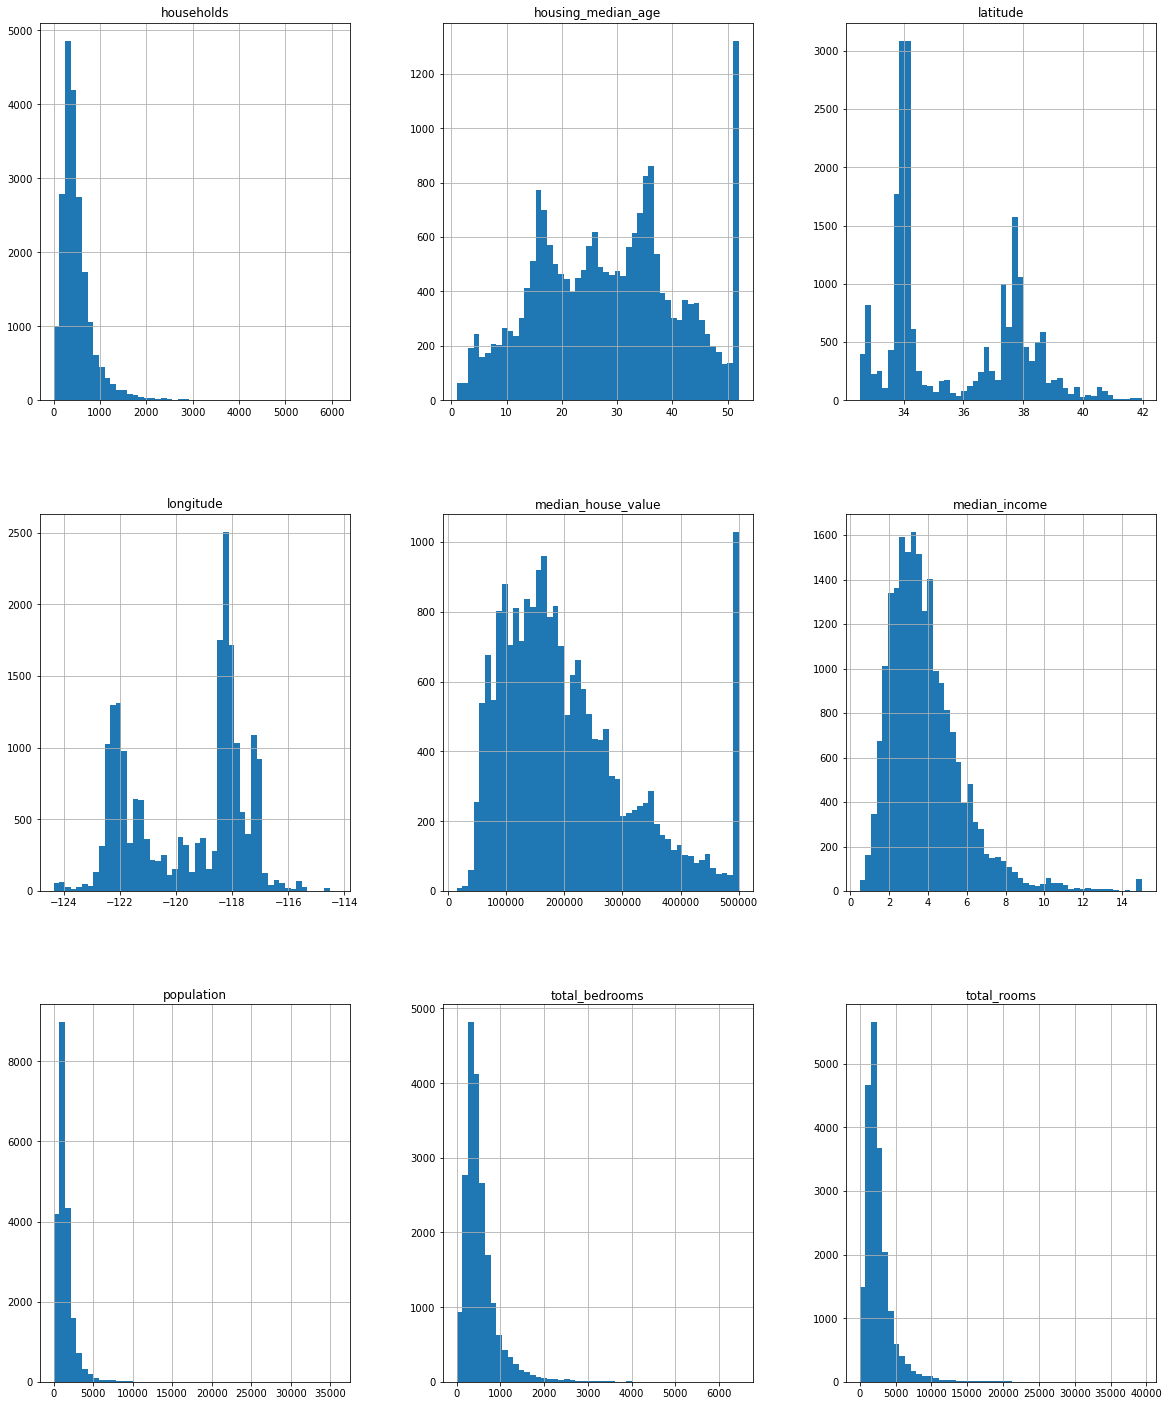

In [36]:
housing.hist(bins=50, figsize=(20,25))
plt.show()

## Create a Test Set

In [40]:
def split_train_test(data, test_ratio, seed):
    np.random.seed(seed) # Use a seed to keep the test set from changing, and the model from seeing the whole set over time
    shuffled_indices = np.random.permutation(len(data)) # create a random ordered array of sequential count equal to the length of the dataset
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2, 5)

print(len(train_set))
print(len(test_set))

16512
4128


In [53]:
# This can be done quickly with sklearn
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print(len(train_set))
print(len(test_set))

16512
4128


The above will fail once the data is updated. We need a way to know if a row was previously in a test set, it goes into a test set again. We can do this by setting a rule based on the hash.

In [49]:
# Setup a unique ID
housing['id'] = housing['longitude']*1000 + housing['latitude']*1000

In [51]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

train_set, test_set = split_train_test_by_id(housing, 0.2, 'id')

print(len(train_set))
print(len(test_set))

16570
4070


The above is based on random splits. If we were confident that median income was important to predicting house value, we would want a sample from each income level to assure our model is using and has been trained on all levels. In essence, we want a stratefied sample. We can do this by splitting income into categories and then splitting based on that.

Pandas offers us the `cut` command.

`pandas.cut(x, bins, right: bool = True, labels=None, retbins: bool = False, precision: int = 3, include_lowest: bool = False, duplicates: str = 'raise')`

In [54]:
housing['income_cat'] = pd.cut(housing['median_income'], 
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf], # A sequence of scalars sets non standard intervals
                              labels=[1,2,3,4,5])

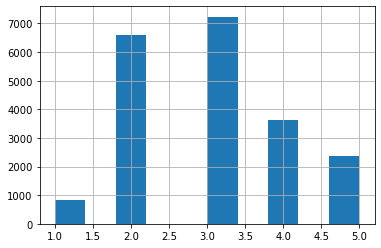

In [55]:
housing['income_cat'].hist()

In [57]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) # set the split parameters
for train_index, test_index in split.split(housing, housing['income_cat']): # Split the indices based on the parameters
    strat_train_set = housing.loc[train_index] #for each index, assign to a set based on the split index
    strat_test_set = housing.loc[test_index]